In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd /gdrive/MyDrive/Seed_type

/gdrive/MyDrive/Seed_type


In [4]:
ls

Class_Seeds.csv


# Importing Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import joblib

# Uploading Dataset

In [7]:
df_train=pd.read_csv('Class_Seeds.csv')
df_train.head()

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymCoeff,KernelGrov_Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               210 non-null    float64
 1   Perimeter          210 non-null    float64
 2   Compactness        210 non-null    float64
 3   KernelLength       210 non-null    float64
 4   KernelWidth        210 non-null    float64
 5   AsymCoeff          210 non-null    float64
 6   KernelGrov_Length  210 non-null    float64
 7   Class              210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [9]:
df_train.describe().style.background_gradient(axis=0,cmap = 'RdYlGn')

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymCoeff,KernelGrov_Length,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


# EDA

In [10]:
df_train.isna().sum()

Area                 0
Perimeter            0
Compactness          0
KernelLength         0
KernelWidth          0
AsymCoeff            0
KernelGrov_Length    0
Class                0
dtype: int64

In [11]:
df_train.columns

Index(['Area', 'Perimeter', 'Compactness', 'KernelLength', 'KernelWidth',
       'AsymCoeff', 'KernelGrov_Length', 'Class'],
      dtype='object')

In [12]:
df_train.Class.value_counts()

1    70
2    70
3    70
Name: Class, dtype: int64

In [13]:
columns = df_train.columns
binary_cols = []
remain_cols=[]
for col in columns:
    if df_train[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
    else:
      remain_cols.append(col)

In [14]:
binary_cols

[]

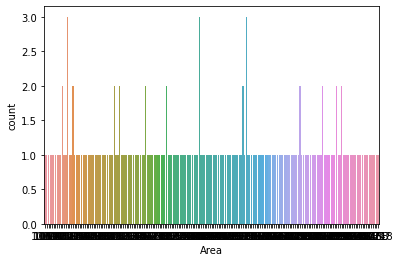

In [15]:
sns.countplot("Area", data=df_train)

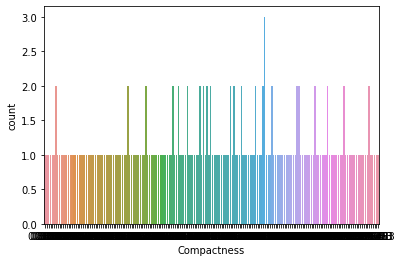

In [16]:
sns.countplot("Compactness", data=df_train)

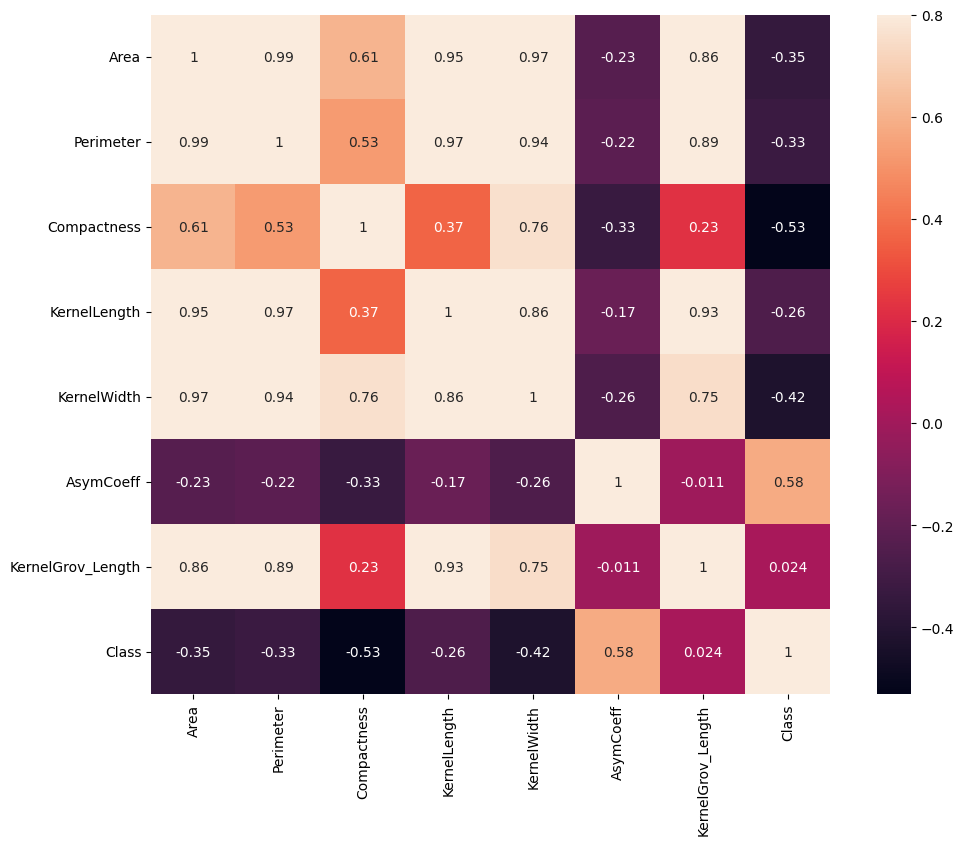

In [17]:
plt.figure(figsize=(12,9),dpi = 100)
sns.heatmap(df_train.corr(),vmax=.8,annot = True, square = True)
plt.show()

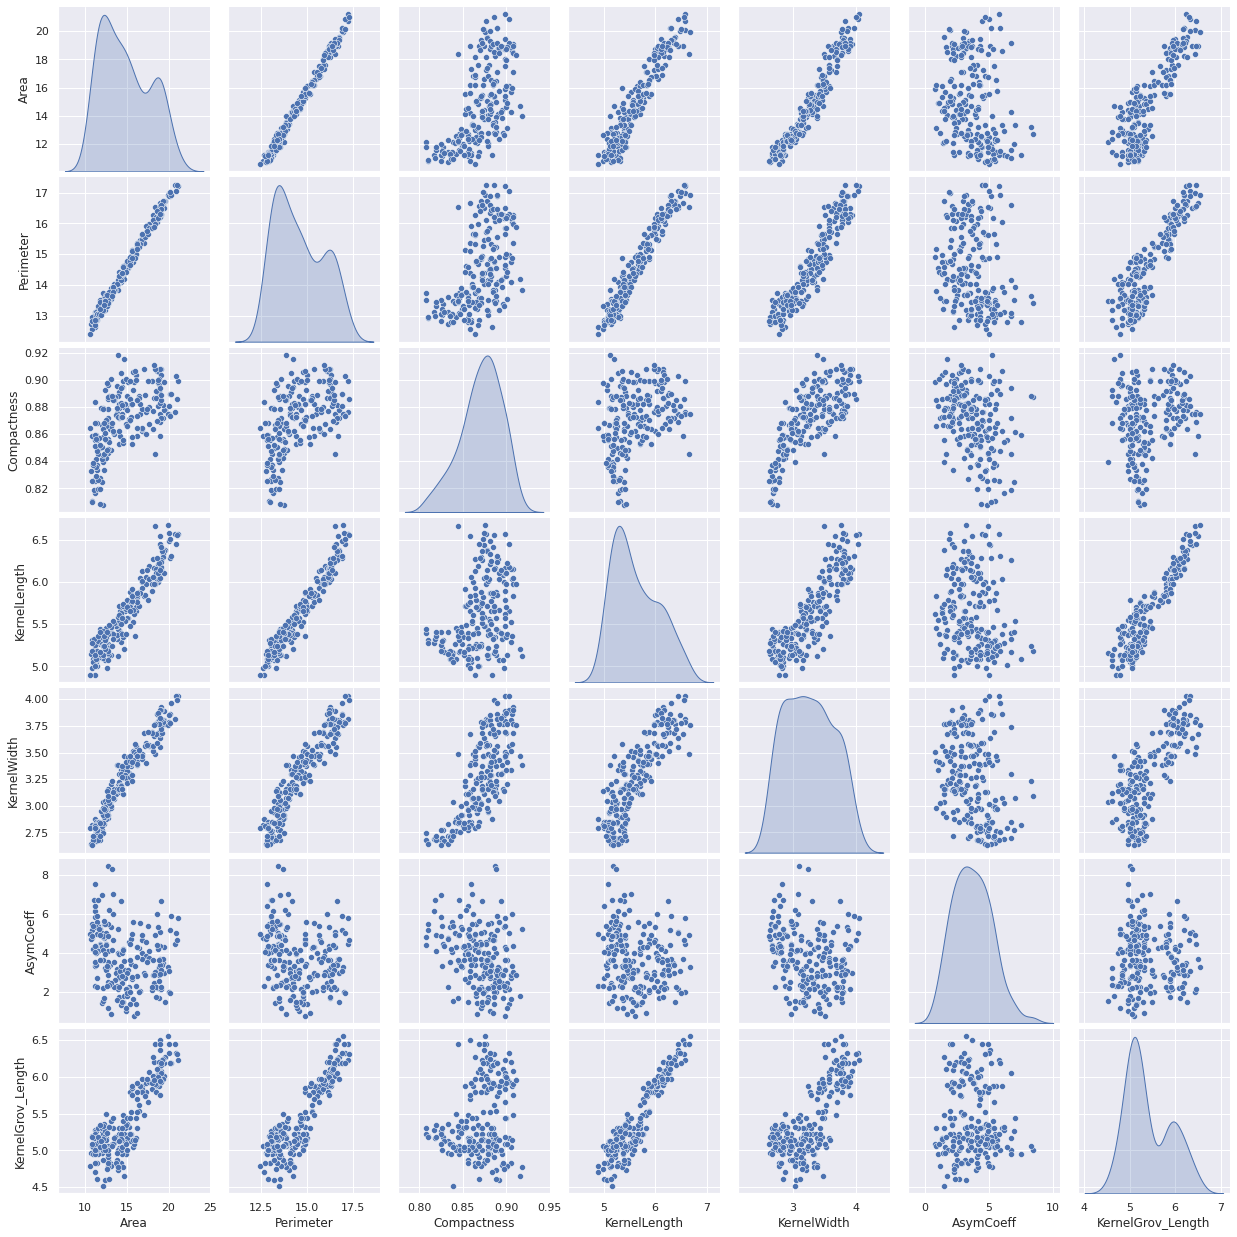

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

In [20]:

X = df_train.drop(['Class'], axis = 1)
Y = df_train["Class"]
x_Data = X.values
y_Data = Y.values

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [24]:
model.score(X_test,y_test)

0.8571428571428571

In [25]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.94117647 0.88235294 0.85294118 0.93939394 0.96969697]


In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [27]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.9345238095238095

In [28]:
confusion_matrix(y_train, pred)

array([[52,  2,  5],
       [ 3, 53,  0],
       [ 1,  0, 52]])

In [29]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [30]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [31]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           1       0.73      0.73      0.73        11
           2       0.93      0.93      0.93        14
           3       0.88      0.88      0.88        17

    accuracy                           0.86        42
   macro avg       0.85      0.85      0.85        42
weighted avg       0.86      0.86      0.86        42



In [32]:
cma = confusion_matrix(y_test, predicted_test)

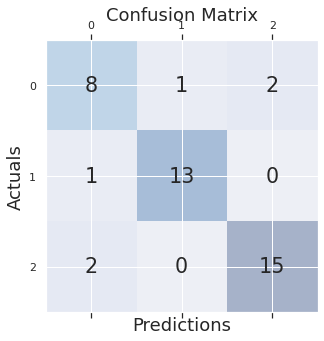

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier as rf

In [35]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [36]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

1.0

In [37]:
confusion_matrix(y_train, pred)

array([[59,  0,  0],
       [ 0, 56,  0],
       [ 0,  0, 53]])

In [38]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [39]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [40]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           1       0.69      0.82      0.75        11
           2       1.00      1.00      1.00        14
           3       0.87      0.76      0.81        17

    accuracy                           0.86        42
   macro avg       0.85      0.86      0.85        42
weighted avg       0.87      0.86      0.86        42



In [41]:
cma = confusion_matrix(y_test, pred_test)

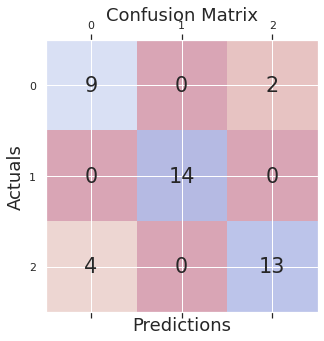

In [42]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [43]:
from sklearn import tree

In [44]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [45]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

1.0

In [46]:
confusion_matrix(y_train, pred1)

array([[59,  0,  0],
       [ 0, 56,  0],
       [ 0,  0, 53]])

In [47]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [48]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

           1       0.71      0.91      0.80        11
           2       1.00      0.93      0.96        14
           3       0.93      0.82      0.87        17

    accuracy                           0.88        42
   macro avg       0.88      0.89      0.88        42
weighted avg       0.90      0.88      0.88        42



In [49]:
cma = confusion_matrix(y_test, pred1_test)

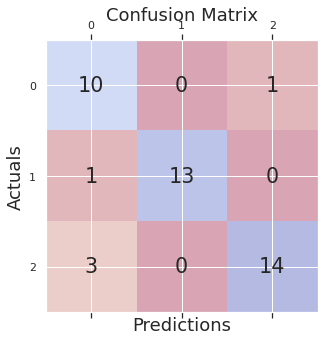

In [50]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression  
clf1= LogisticRegression(random_state=0)  
clf1.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [52]:
pred_LR= clf1.predict(X_train)
accuracy_score(y_train, pred_LR)

0.9464285714285714

In [53]:
confusion_matrix(y_train, pred_LR)

array([[55,  2,  2],
       [ 4, 52,  0],
       [ 1,  0, 52]])

In [54]:
pred_LR_test = clf1.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [55]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

           1       0.82      0.82      0.82        11
           2       1.00      1.00      1.00        14
           3       0.88      0.88      0.88        17

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



In [56]:
cma = confusion_matrix(y_test, pred_LR_test)

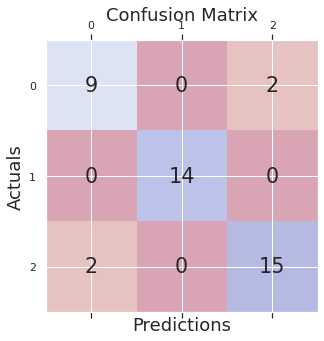

In [57]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [58]:
from sklearn.neural_network import MLPClassifier

In [59]:
clf2= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [60]:
pred_NN= clf2.predict(X_train)
accuracy_score(y_train, pred_NN)

0.35119047619047616

In [61]:
confusion_matrix(y_train, pred_NN)

array([[59,  0,  0],
       [56,  0,  0],
       [53,  0,  0]])

In [62]:
pred_NN_test = clf2.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [63]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

           1       0.26      1.00      0.42        11
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        17

    accuracy                           0.26        42
   macro avg       0.09      0.33      0.14        42
weighted avg       0.07      0.26      0.11        42



In [64]:
cma = confusion_matrix(y_test, pred_NN_test)

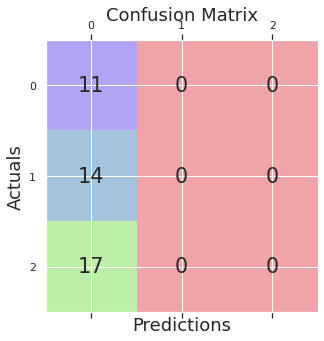

In [65]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# XGBOOST

In [66]:
import xgboost as xgb

In [67]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [68]:
pred_XGB= xgb.predict(X_train)
accuracy_score(y_train, pred_XGB)

1.0

In [69]:
confusion_matrix(y_train, pred_XGB)

array([[59,  0,  0],
       [ 0, 56,  0],
       [ 0,  0, 53]])

In [70]:
pred_XGB_test = xgb.predict(X_test)
v=accuracy_score(y_test, pred_XGB_test)

In [71]:
print(classification_report(y_test, pred_XGB_test))

              precision    recall  f1-score   support

           1       0.83      0.91      0.87        11
           2       1.00      1.00      1.00        14
           3       0.94      0.88      0.91        17

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



In [72]:
cma = confusion_matrix(y_test, pred_XGB_test)

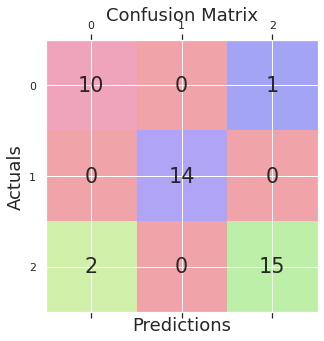

In [73]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

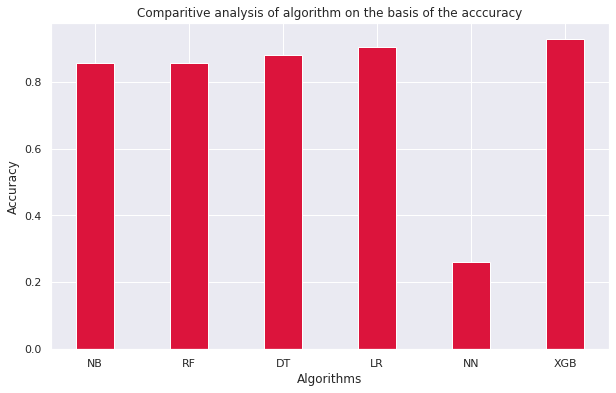

In [74]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'NN':u,'XGB':v}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 6))
# creating the bar plot
plt.bar(courses, values, color ='crimson',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparitive analysis of algorithm on the basis of the acccuracy")
plt.show()


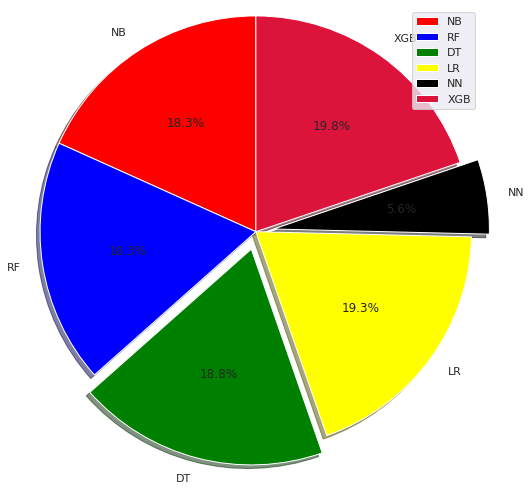

In [75]:
activities = ['NB', 'RF', 'DT', 'LR','NN','XGB'] 
# portion covered by each label
slices = [p,q,r,s,u,v]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','black','crimson']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0.1,0),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()

# Model saving

In [76]:
filename = 'naive_bayes.sav'
joblib.dump(model, filename)
filename1 = 'random_forest_Classifier.sav'
joblib.dump(clf_forest, filename1)
filename2 = 'decision_tree_classifier.sav'
joblib.dump(clf, filename2)
filename3 = 'logistic_regression.sav'
joblib.dump(clf1, filename3)
filename4 = 'neural_networks.sav'
joblib.dump(clf2, filename4)
filename5 = 'XGBOOST.sav'
joblib.dump(xgb, filename5)

['XGBOOST.sav']